In [2]:
# Загружаем библиотеки
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random
import seaborn as sns
import math

## <font color = green> Задание №1 </font>
Построение 95% доверительного интервала для выборки

Для данных из файла 'file_1' проверьте, принадлежит ли выборка популяции со средним, равным 14.
Также случайным образом отберите подвыборку из 30 элементов и проверьте для нее.

In [3]:
# Импортируем файл с данными
task_1 = pd.read_excel('file_1.xlsx')
print('Всего наблюдений:', len(task_1))

task_1.head(3)

Всего наблюдений: 200


,№,Value
0,0,10.405433
1,1,6.847904
2,2,10.171496


In [4]:
#Найдем по выборке среднее значение и стандартное отклонение
m = np.mean(task_1['Value'])
s = np.std(task_1['Value'])
print('Среднее по выборке равно: ', m)
print('Стандартное отклонение равно:', s)

Среднее по выборке равно:  14.4056783306397
Стандартное отклонение равно: 5.207907315704131


In [5]:
# Проверим, принадлежит ли выборка популяции с нормальным распределением со средним 14
# Рассчитаем 95% ДИ
lower = np.percentile(task_1['Value'], 2.5)
upper = np.percentile(task_1['Value'], 97.5)
print("95% доверительный интервал среднего:", (round(lower, 2), round(upper, 2)))

95% доверительный интервал среднего: (3.99, 23.96)


In [6]:
#Проверим доверительный интервал с помощью библиотеки scipy
# Рассчитаем 95% ДИ, используя z-распределение
CI_1 = st.norm.interval(alpha=0.95, loc=m, scale=s)
print("95% доверительный интервал среднего (z-распределение):", CI_1)

95% доверительный интервал среднего (z-распределение): (4.198367557036935, 24.612989104242466)


C:\Users\Doom\AppData\Local\Temp\ipykernel_15176\3000017881.py:3: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  CI_1 = st.norm.interval(alpha=0.95, loc=m, scale=s)


Для маленьких выборок (20-100 объектов) z-распределение дает большую ошибку, поэтому лучше использовать t-распределение

In [7]:
#Выберем 30 объектов случайно из датафрейма:
np.random.seed(0)
sample_1 = task_1.sample(n = 30)

print('Количество наблюдений в подвыборке:', len(sample_1))

Количество наблюдений в подвыборке: 30


In [8]:
#z-распределение
CI_z = st.norm.interval(alpha=0.95, loc=np.mean(sample_1['Value']), scale=np.std(sample_1['Value']))
print("95% доверительный интервал среднего (z-распределение):", CI_z)

#t-распределение
CI_t = st.t.interval(alpha=0.95, df=len(sample_1['Value'])-1, loc=np.mean(sample_1['Value']), scale=np.std(sample_1['Value']))
print("95% доверительный интервал среднего (t-распределение):", CI_t)


95% доверительный интервал среднего (z-распределение): (6.707932294542735, 23.471717942320524)
95% доверительный интервал среднего (t-распределение): (6.3432890617398066, 23.836361175123454)


C:\Users\Doom\AppData\Local\Temp\ipykernel_15176\531734081.py:2: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  CI_z = st.norm.interval(alpha=0.95, loc=np.mean(sample_1['Value']), scale=np.std(sample_1['Value']))
C:\Users\Doom\AppData\Local\Temp\ipykernel_15176\531734081.py:6: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  CI_t = st.t.interval(alpha=0.95, df=len(sample_1['Value'])-1, loc=np.mean(sample_1['Value']), scale=np.std(sample_1['Value']))


## <font color = green> Задание №2 </font>
Расчет p-value и тестирование гипотез

В файле 'file_2' представлены данные за год со средним количеством сообщений в день, отправленных в чат.
Существует гипотеза, что в среднем было отправлено 200 сообщений в день. Альтернативная гипотеза: больше 200 сообщений.
Проверьте это с помощью доверительного интервала и p-value. Используйте для этого подвыборку из 50 дней.
Возьмите уровень значимости равным 10%.

In [9]:
# Импортируем файл с данными
task_2 = pd.read_excel('file_2.xlsx')
print('Всего наблюдений:', len(task_2))


Всего наблюдений: 365


In [10]:
task_2

,№,Quantity
0,1,212
1,2,166
2,3,213
3,4,202
4,5,232
...,...,...
360,361,196
361,362,217
362,363,211
363,364,203


In [11]:
#Проверим гипотезу, что в среднем в день отправляли 200 (а не больше) сообщений в чате по выборке из 50 дней
#Уровень значимости равен 10%
M200 = 200
n = 50
a = 0.1

#Выберем 50 дней
np.random.seed(0)
sample_2 = task_2.sample(n = 50)

sample_2.head(3)

,№,Quantity
106,107,225
259,260,198
45,46,193


<AxesSubplot: ylabel='Count'>

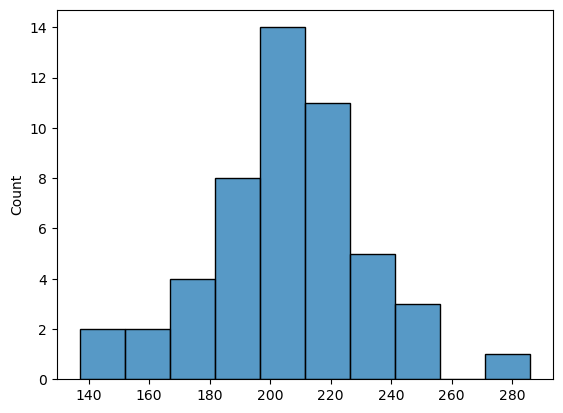

In [12]:
#Построим график
x = np.asarray(sample_2['Quantity'])
sns.histplot(x, bins=10)

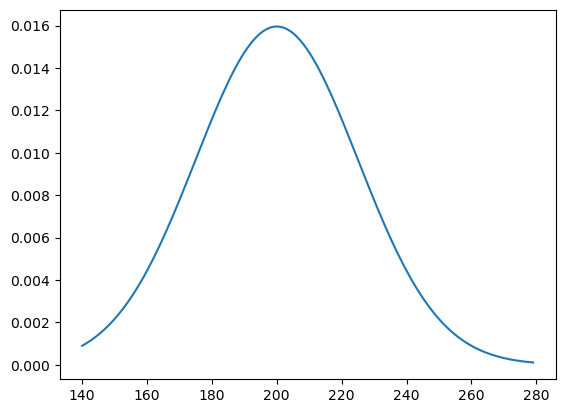

In [13]:
#Построим кривую нормального распределения со средним 200:
x = np.arange (140, 280, 1)
plt.plot(x, st.norm.pdf (x, 200, 25))

In [14]:
#Найдем среднее и стандартное отклонение
m2 = np.mean(sample_2['Quantity'])
s2 = np.std(sample_2['Quantity'])

#Найдем t-статистику
t_2 = (m2-M200)/(s2/np.sqrt(n))

#Найдем p-value для найденной статистики (для одностороннего интервала)
p_value2 = 1-st.t.cdf(t_2, df=n-1)

print('P-value по итогам тестирования гипотезы равно: ', p_value2)

P-value по итогам тестирования гипотезы равно:  0.0823155140552927


In [15]:
if p_value2 < a:
    print('P-value меньше выбранного уровня значимости. Следовательно, основную гипотезу отклоняем: среднее количество сообщений в день было больше 200.')
else:
    print('P-value больше выбранного уровня значимости. Следовательно, основную гипотезу не отклоняем: среднее количество сообщений в день было 200.')

P-value меньше выбранного уровня значимости. Следовательно, основную гипотезу отклоняем: среднее количество сообщений в день было больше 200.


In [16]:
#Сравним результаты, полученные по p-value с доверительным интервалом (односторонним) для 90%
#Найдем критическое значение
t_critical = st.t.ppf(0.90, n-1)

print("Критическое значение для 90%:", t_critical)
print('Расчитанная t-статистика:', t_2)

Критическое значение для 90%: 1.2990687845090696
Расчитанная t-статистика: 1.4107662081714105


In [17]:
if t_2 < t_critical:
    print('Расчитанная статитика лежит слева от критического значения. Следовательно, основную гипотезу не отклоняем: среднее количество сообщений в день было 200.')
else:
    print('Расчитанная статитика лежит справа от критического значения. Следовательно, основную гипотезу отклоняем: среднее количество сообщений в день было больше 200.')

Расчитанная статитика лежит справа от критического значения. Следовательно, основную гипотезу отклоняем: среднее количество сообщений в день было больше 200.


## <font color = green> Задание №3 </font>
Гипотеза для двух выборок.

Сгенерируйте 2 выборки от 21 до 43. Проверьте, равны ли средние у получившихся выборок.
При расчете статистики и выборе теста обращайте внимание на предпосылки. Уровень значимости - 5%.

In [18]:
#Сгенерируем данные от 21 до 43 кг
group1 = [21, 37, 34, 33, 41, 25, 26, 29, 35, 37, 38, 41, 34]
group2 = [23, 43, 38, 37, 32, 24, 27, 29, 37, 35, 32]

In [19]:
#Найдем средние выборочные и стандартные отклонения

m_g1 = np.mean(group1)
m_g2 = np.mean(group2)
s_g1 = np.std(group1)
s_g2 = np.std(group2)

print('Среднее и стандартное отклонение первой выборки:', round(m_g1,2), 'и', round(s_g1,2))
print('Среднее и стандартное отклонение второй выборки:', round(m_g2,2), 'и', round(s_g2,2))

Среднее и стандартное отклонение первой выборки: 33.15 и 5.97
Среднее и стандартное отклонение второй выборки: 32.45 и 5.98


In [20]:
st.ttest_ind (a=group1, b=group2)

Ttest_indResult(statistic=0.27358633827584844, pvalue=0.7869546251019248)

## <font color = green> Дополнительные задания </font>

Доверительный интервал для хи-квадрат распределения.
Сгенерируйте данные и найдите 95% доверительный интервал.

In [45]:
#Генерация данных с хи-квадрат распределением
np.random.seed(0)
data_4 = np.random.chisquare(3, 1000)
df_4 = pd.DataFrame(data_4)
df_4.columns = ['Value']
df_4.index.name = '№'

#Записываем в файл, но можно сразу использовать df_4 (здесь +новые функции для изучения)
df_4.to_excel(excel_writer = "file_4.xlsx")

task_4 = pd.read_excel('file_4.xlsx')
print(len(task_4))

1000


<AxesSubplot:ylabel='Count'>

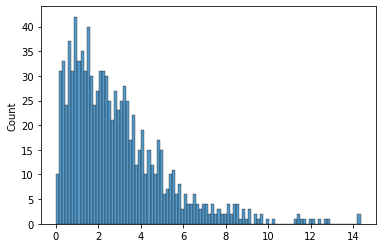

In [46]:
x = np.array(task_4['Value'])
sns.histplot(x, bins=100)

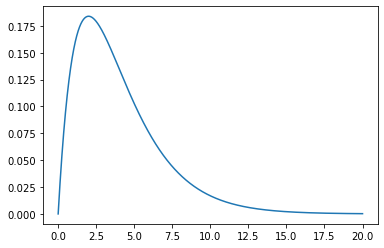

In [47]:
#Посмотрим, как выглядит хи-квадрат распределение
x_4 = np.arange (0, 20, 0.001)
plt.plot (x_4, st.chi2.pdf (x_4, df= 4 ))

Принадлежит ли выборка популяции со средним, равным 1000?

In [49]:
CI_chi2 = st.chi2.interval(alpha=0.95, df=len(task_4['Value'])-1)
print("95% доверительный интервал среднего (хи2-распределение):", CI_chi2)

95% доверительный интервал среднего (хи2-распределение): (913.3009983021134, 1088.4870677259353)


## <font color = green> Дополнительные задания </font>

Сгенерируйте данные (500 элементов) с нормальным распределением, средним 55 и стандартным отклонением 15.
Случайным образом выберите 35 элементов и при 10% уровне значимости проверьте гипотезу о том, что среднее равно 50.
Альтернативная гипотеза: среднее больше 50.

In [52]:
np.random.seed(0)
task_5 = np.random.normal(55, 15, 500)
df_5 = pd.DataFrame(task_5)
df_5.columns = ['Value']
df_5.index.name = '№'

In [55]:
n5 = 35
M50 = 50
a5 = 0.1

In [56]:
np.random.seed(0)
sample_5 = df_5.sample(n = n5)
sample_5.head(3)

,Value
№,
90,44.789341
254,72.090270
283,46.830004


<AxesSubplot:ylabel='Count'>

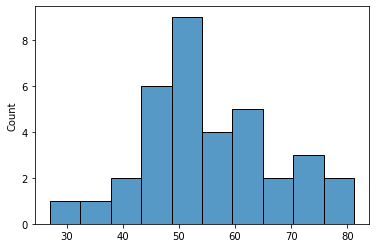

In [57]:
x_5 = np.array(sample_5['Value'])
sns.histplot(x_5, bins = 10)

In [60]:
m5 = np.mean(sample_5['Value'])
s5 = np.std(sample_5['Value'])

t_5 = (m5 - M50)/(s5/np.sqrt(n5))
p_value_5 = 1 - st.t.cdf(t_5, df = n5-1)
t_critical_5 = st.t.ppf(0.90, n5-1)

print('p-value равен ', p_value_5)
print('t-статистика равна ', t_5)

p-value равен  0.008530476399183473
t-статистика равна  2.5084371043690172


In [63]:
if t_5 < t_critical_5:
    print('Расчитанная статитика лежит слева от критического значения. Следовательно, основную гипотезу не отклоняем: среднее количество сообщений в день было 50.')
else:
    print('Расчитанная статитика лежит справа от критического значения. Следовательно, основную гипотезу отклоняем: среднее количество сообщений в день было больше 50.')

Расчитанная статитика лежит справа от критического значения. Следовательно, основную гипотезу отклоняем: среднее количество сообщений в день было больше 50.


In [64]:
if p_value_5 < a5:
    print('P-value меньше выбранного уровня значимости. Следовательно, основную гипотезу отклоняем: среднее количество сообщений в день было больше 50.')
else:
    print('P-value больше выбранного уровня значимости. Следовательно, основную гипотезу не отклоняем: среднее количество сообщений в день было 50.')

P-value меньше выбранного уровня значимости. Следовательно, основную гипотезу отклоняем: среднее количество сообщений в день было больше 50.
